# Kickstarter Dataset Analysis

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.color_palette("crest", as_cmap=True)
sns.set_palette("crest")
import warnings 
warnings.filterwarnings('ignore')


## Load Data

In [3]:
df = pd.read_csv("../data/DSI_kickstarterscrape_dataset.csv")
df.head()

project id                                               name  \
0       39409                              WHILE THE TREES SLEEP   
1      126581               Educational Online Trading Card Game   
2      138119                                              STRUM   
3      237090  GETTING OVER - One son's search to finally kno...   
4      246101  The Launch of FlyeGrlRoyalty &quot;The New Nam...   

                                                 url      category  \
0  http://www.kickstarter.com/projects/emiliesaba...  Film & Video   
1  http://www.kickstarter.com/projects/972789543/...         Games   
2  http://www.kickstarter.com/projects/185476022/...  Film & Video   
3  http://www.kickstarter.com/projects/charnick/g...  Film & Video   
4  http://www.kickstarter.com/projects/flyegrlroy...       Fashion   

          subcategory         location      status     goal  pledged  \
0          Short Film     Columbia, MO  successful  10500.0  11545.0   
1  Board & Card Games    Maplewood, NJ      failed   4000.0     20.0   
2           Animation  Los Angeles, CA        live  20000.0     56.0   
3         Documentary  Los Angeles, CA  successful   6000.0   6535.0   
4             Fashion         Novi, MI      failed   3500.0      0.0   

   funded percentage  backers                      funded date  levels  \
0           1.099524       66  Fri, 19 Aug 2011 19:28:17 -0000       7   
1           0.005000        2  Mon, 02 Aug 2010 03:59:00 -0000       5   
2           0.002800        3  Fri, 08 Jun 2012 00:00:31 -0000      10   
3           1.089167      100  Sun, 08 Apr 2012 02:14:00 -0000      13   
4           0.000000        0  Wed, 01 Jun 2011 15:25:39 -0000       6   

                                       reward levels  updates  comments  \
0               $25,$50,$100,$250,$500,$1,000,$2,500       10         2   
1                                  $1,$5,$10,$25,$50        6         0   
2  $1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001        1         0   
3  $1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...        4         0   
4                         $10,$25,$50,$100,$150,$250        2         0   

   duration  
0     30.00  
1     47.18  
2     28.00  
3     32.22  
4     30.00

## Data Cleaning

In [3]:
# Data cleaning to get rid of repeat and format errors
df["category"][df["category"] == "Film &amp; Video"] = "Film & Video"
df["subcategory"][df["subcategory"] == "Country &amp; Folk"] = "Country & Folk"
df["subcategory"][df["subcategory"] == "Film &amp; Video"] = "Film & Video"
df["subcategory"][df["subcategory"] == "Board &amp; Card Games"] = "Board & Card Games"


df["subcategory"].unique()

array(['Short Film', 'Board & Card Games', 'Animation', 'Documentary',
       'Fashion', 'Music', 'Illustration', 'Film & Video',
       'Open Software', 'Indie Rock', 'Dance', 'Fiction', 'Nonfiction',
       'Theater', 'Games', 'Art Book', 'Country & Folk', 'Comics',
       'Webseries', 'Technology', 'Performance Art', 'Narrative Film',
       'Video Games', 'Product Design', 'Rock', 'Painting', 'Photography',
       'Conceptual Art', 'Jazz', 'Open Hardware', 'Classical Music',
       'Food', 'Art', 'Pop', 'Journalism', 'Poetry', 'Electronic Music',
       'World Music', 'Sculpture', 'Publishing', "Children's Book",
       'Public Art', 'Mixed Media', 'Graphic Design', 'Hip-Hop',
       'Periodical', 'Crafts', 'Design', 'Digital Art'], dtype=object)

### Combine funding status

In [4]:
df["status"].unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

## Make new features

### Difference between goal and pledged

In [5]:
df["difference between goal and pledge"] = df["goal"] - df["pledged"]

### Date

In [6]:
df["weekday"] = df["funded date"].str.split(",").str[0]

df["fund date and time"] = df["funded date"].str.split(",").str[1]

df["day"] = df["fund date and time"].str.split(" ").str[1].str.strip().astype("int64")
df["month"] = df["fund date and time"].str.split(" ").str[2].str.strip()
df["year"] = df["fund date and time"].str.split(" ").str[3].str.strip().astype("int64")
df["time"] = df["fund date and time"].str.split(" ").str[4].str.strip()

df["datetime"] = df[['day', 'month', "year"]].astype(str).agg('-'.join, axis=1)
df["datetime"] = df[["datetime", "time"]].agg(" ".join, axis = 1)
df["datetime"] = pd.to_datetime(df["datetime"])

df['hour'] = pd.DatetimeIndex(df['datetime']).hour

months_dict = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, 
          "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}
df["month numeric"] = df["month"].replace(months_dict)

df = df.drop("fund date and time", axis = 1)

In [7]:
df["category and subcategory"] = df["category"]+ " - " + df["subcategory"]
df["category and subcategory"].unique()


array(['Film & Video - Short Film', 'Games - Board & Card Games',
       'Film & Video - Animation', 'Film & Video - Documentary',
       'Fashion - Fashion', 'Music - Music', 'Art - Illustration',
       'Film & Video - Film & Video', 'Technology - Open Software',
       'Music - Indie Rock', 'Dance - Dance', 'Publishing - Fiction',
       'Publishing - Nonfiction', 'Theater - Theater', 'Games - Games',
       'Publishing - Art Book', 'Music - Country & Folk',
       'Comics - Comics', 'Film & Video - Webseries',
       'Technology - Technology', 'Art - Performance Art',
       'Film & Video - Narrative Film', 'Games - Video Games',
       'Design - Product Design', 'Music - Rock', 'Art - Painting',
       'Photography - Photography', 'Art - Conceptual Art',
       'Music - Jazz', 'Technology - Open Hardware',
       'Music - Classical Music', 'Food - Food', 'Art - Art',
       'Music - Pop', 'Publishing - Journalism', 'Publishing - Poetry',
       'Music - Electronic Music', 'Music -

In [8]:
df = df.sort_values(['category','subcategory'],ascending=[True,True])

In [9]:
pd.set_option('display.max_columns', 0)
df.columns = df.columns.str.capitalize()
df.head()

Project id  ... Category and subcategory
96      4684967  ...                Art - Art
100     4732285  ...                Art - Art
190     9729076  ...                Art - Art
193     9993639  ...                Art - Art
231    11201727  ...                Art - Art

[5 rows x 27 columns]

## Analysis


### Response Variable

Text(0.5, 0, 'Count')

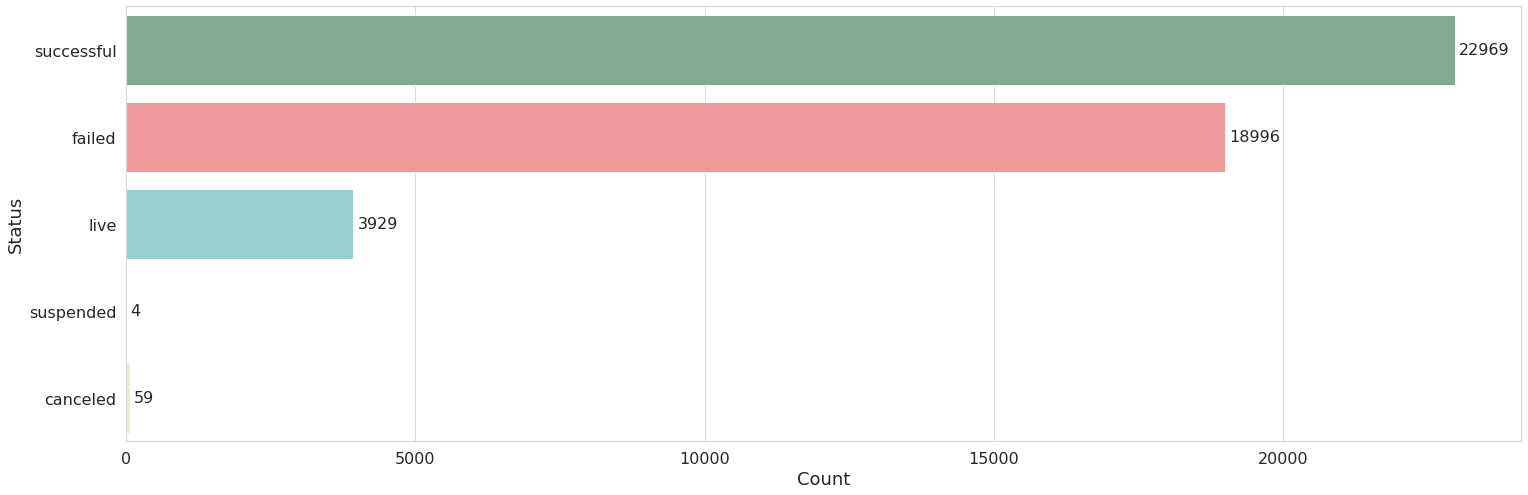

In [10]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'grid.color':'#d9d9d9', "axes.edgecolor":'#d9d9d9',
           "font.size": 16, "axes.labelsize" : 18, "xtick.labelsize" : 16, "ytick.labelsize" : 16})

# Create an array with the colors you want to use
colors = ["#7EAF92", "#fc8b8b", "#8DDAD6", "#faeb87", "#f5efcb"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(25,8))
count_status = sns.countplot(data = df, y = "Status")
plt.bar_label(count_status.containers[0], padding = 4)
plt.xlabel("Count")


In [11]:
# Separate successful and failed
df_successful = df[df["Status"] == "successful"]
df_failed = df[df["Status"] == "failed"]


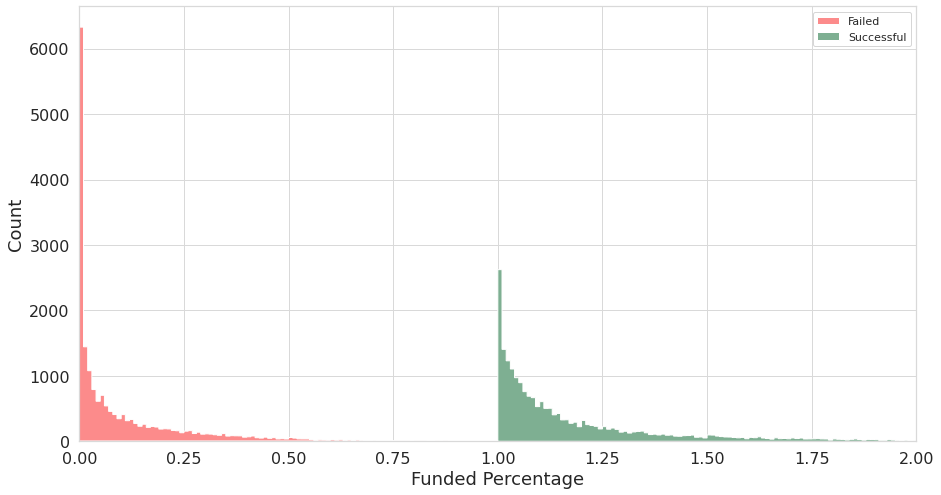

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
#sns.displot(data=df, x="Funded percentage", hue = "Status", kde = False)
"""h, bins = np.histogram(df["Funded percentage"], bins = 500000)
y_hist = plt.bar(bins[:-1], h)"""
labels = ["Failed", "Successful"]
percentage_both = [df_successful["Funded percentage"], df_failed["Funded percentage"]]
y_hist= plt.hist(percentage_both, bins =1506600, 
                 histtype = "stepfilled")
plt.xlim(0, 2)
plt.xlabel("Funded Percentage")
plt.ylabel("Count")
plt.legend(labels, loc='upper right')


In [13]:
# Drop live, canceled and suspended
df = df.drop(df[(df["Status"] == "live") | (df["Status"] == "canceled")| (df["Status"] == "suspended")].index, axis = 0)


In [14]:
df = df.drop("Project id", axis = 1)

In [15]:
(df_successful["Funded percentage"] >= 1.5).sum()
#np.histogram(df["Funded percentage"], bins = 1506600)

3961

<AxesSubplot:>

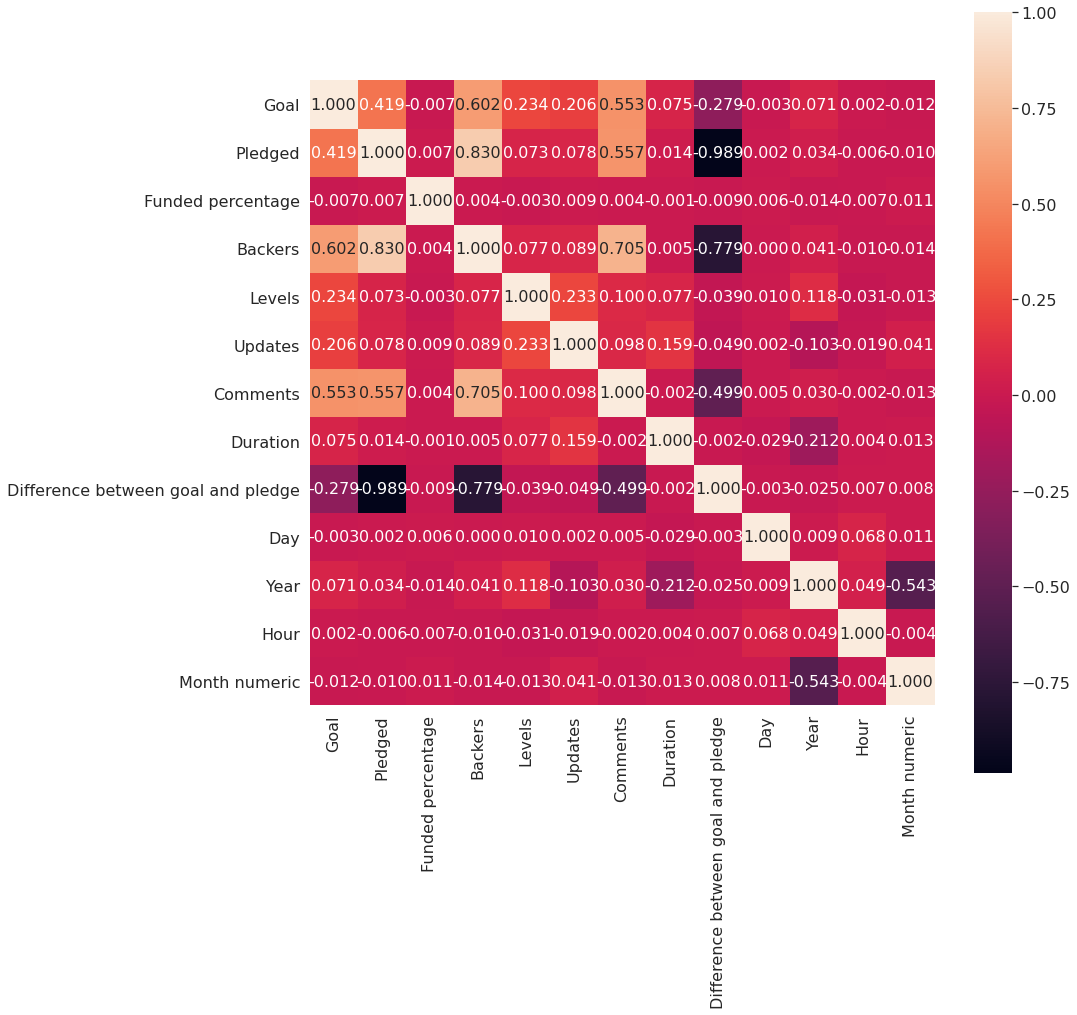

In [16]:
#df_successful.corr()
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_successful.iloc[:,1:].corr(), square = True, annot = True, fmt = '.3f')

### Predictor

#### Cateogory and Subcategory

In [17]:
subcategory_count_total = df["Category"].value_counts()
subcategory_count_s = df_successful["Category"].value_counts()
subcategory_count_f = df_failed["Category"].value_counts()
all_counts = pd.concat([subcategory_count_total, subcategory_count_s, subcategory_count_f], axis = 1)
all_counts.columns = ["Total", "Successful", "Failed"]
all_counts.loc['Average']= all_counts.mean()

all_counts["Successful Percentage"] = round(all_counts.Successful/ all_counts.Total*100, 0).astype("int64")
all_counts["Failed Percentage"] = round(all_counts.Failed/ all_counts.Total*100, 0).astype("int64")
all_counts["Total Percentage"] = 100
all_counts_regular = all_counts.iloc[:-1, :].sort_values(by = "Successful Percentage", ascending = False)
all_counts_average = all_counts.iloc[-1:, :]

all_counts = pd.concat([all_counts_regular, all_counts_average], axis = 0)
all_counts

Total   Successful  ...  Failed Percentage  Total Percentage
Dance           707.000000   527.000000  ...                 25               100
Theater        2322.000000  1642.000000  ...                 29               100
Music         10053.000000  6792.000000  ...                 32               100
Art            3691.000000  2106.000000  ...                 43               100
Comics          968.000000   520.000000  ...                 46               100
Film & Video  12595.000000  6423.000000  ...                 49               100
Food           1298.000000   655.000000  ...                 50               100
Design         1566.000000   729.000000  ...                 53               100
Photography    1387.000000   645.000000  ...                 53               100
Games          1467.000000   635.000000  ...                 57               100
Publishing     4155.000000  1671.000000  ...                 60               100
Technology      737.000000   289.000000  ...                 61               100
Fashion        1019.000000   335.000000  ...                 67               100
Average        3228.076923  1766.846154  ...                 45               100

[14 rows x 6 columns]

Text(0, 0.5, 'Percentage of success and failure')

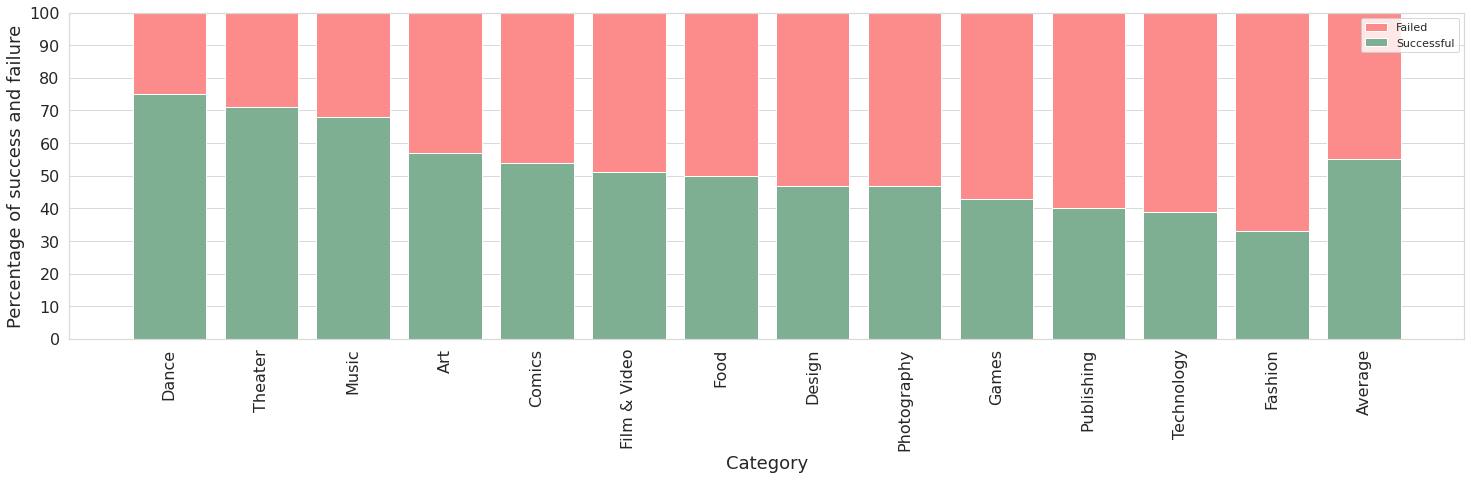

In [18]:
fig, ax = plt.subplots(figsize=(25,6))

labels = ["Failed", "Successful"]
#plt.hist(duration_both, bins = round((df["Duration"].max()-df["Duration"].min())/2), density=True)
plt.bar(all_counts.index, all_counts["Total Percentage"], color = "#fc8b8b")
plt.bar(all_counts.index, all_counts["Successful Percentage"], color = "#7EAF92")


plt.ylim(0,100)
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.legend(labels)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Percentage of success and failure")



Text(0, 0.5, 'Percentage of success and failure')

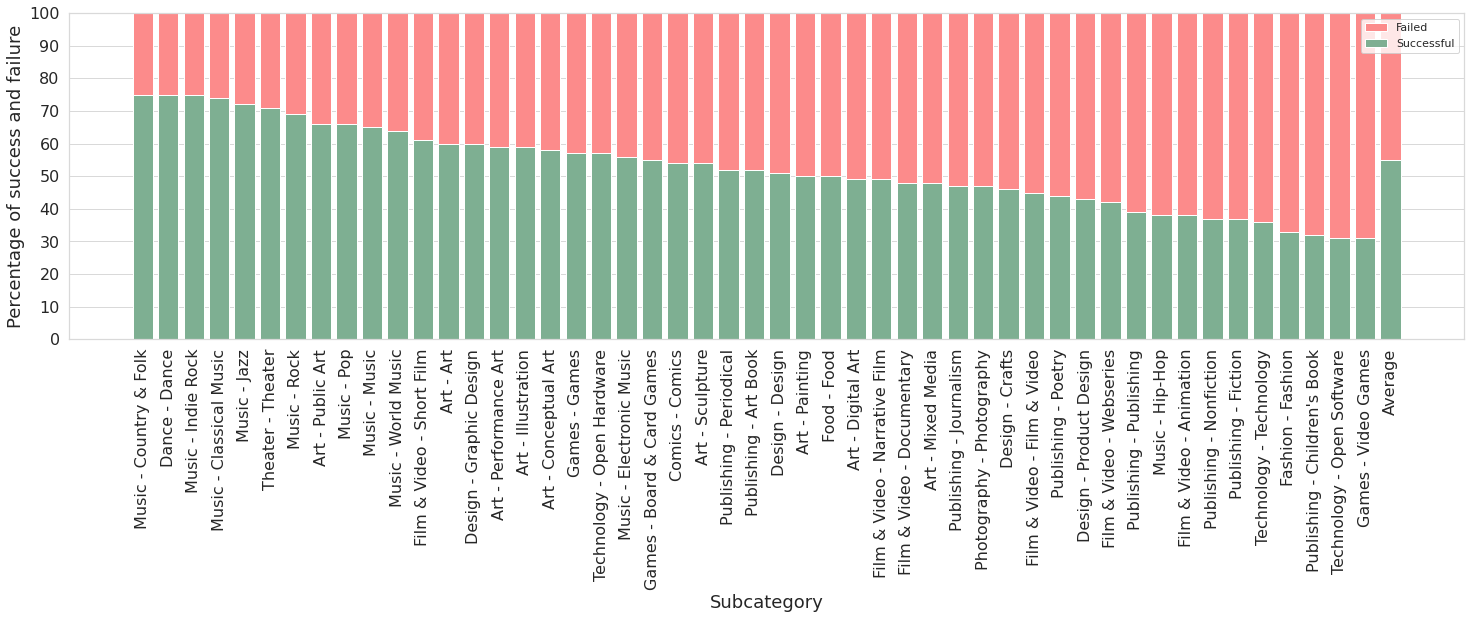

In [19]:
subcategory_count_total = df["Category and subcategory"].value_counts()
subcategory_count_s = df_successful["Category and subcategory"].value_counts()
subcategory_count_f = df_failed["Category and subcategory"].value_counts()
all_counts = pd.concat([subcategory_count_total, subcategory_count_s, subcategory_count_f], axis = 1)
all_counts.columns = ["Total", "Successful", "Failed"]
all_counts.loc['Average']= all_counts.mean()

all_counts["Successful Percentage"] = round(all_counts.Successful/ all_counts.Total*100, 0).astype("int64")
all_counts["Failed Percentage"] = round(all_counts.Failed/ all_counts.Total*100, 0).astype("int64")
all_counts["Total Percentage"] = 100
all_counts_regular = all_counts.iloc[:-1, :].sort_values(by = "Successful Percentage", ascending = False)
all_counts_average = all_counts.iloc[-1:, :]

all_counts = pd.concat([all_counts_regular, all_counts_average], axis = 0)
all_counts

fig, ax = plt.subplots(figsize=(25,6))

labels = ["Failed", "Successful"]
#plt.hist(duration_both, bins = round((df["Duration"].max()-df["Duration"].min())/2), density=True)
plt.bar(all_counts.index, all_counts["Total Percentage"], color = "#fc8b8b")
plt.bar(all_counts.index, all_counts["Successful Percentage"], color = "#7EAF92")


plt.ylim(0,100)
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.legend(labels)
plt.xticks(rotation=90)
plt.xlabel("Subcategory")
plt.ylabel("Percentage of success and failure")


Index(['Dance', 'Film & Video', 'Fashion', 'Theater', 'Food', 'Art', 'Music',
       'Publishing', 'Photography', 'Comics', 'Design', 'Technology', 'Games'],
      dtype='object', name='Category')

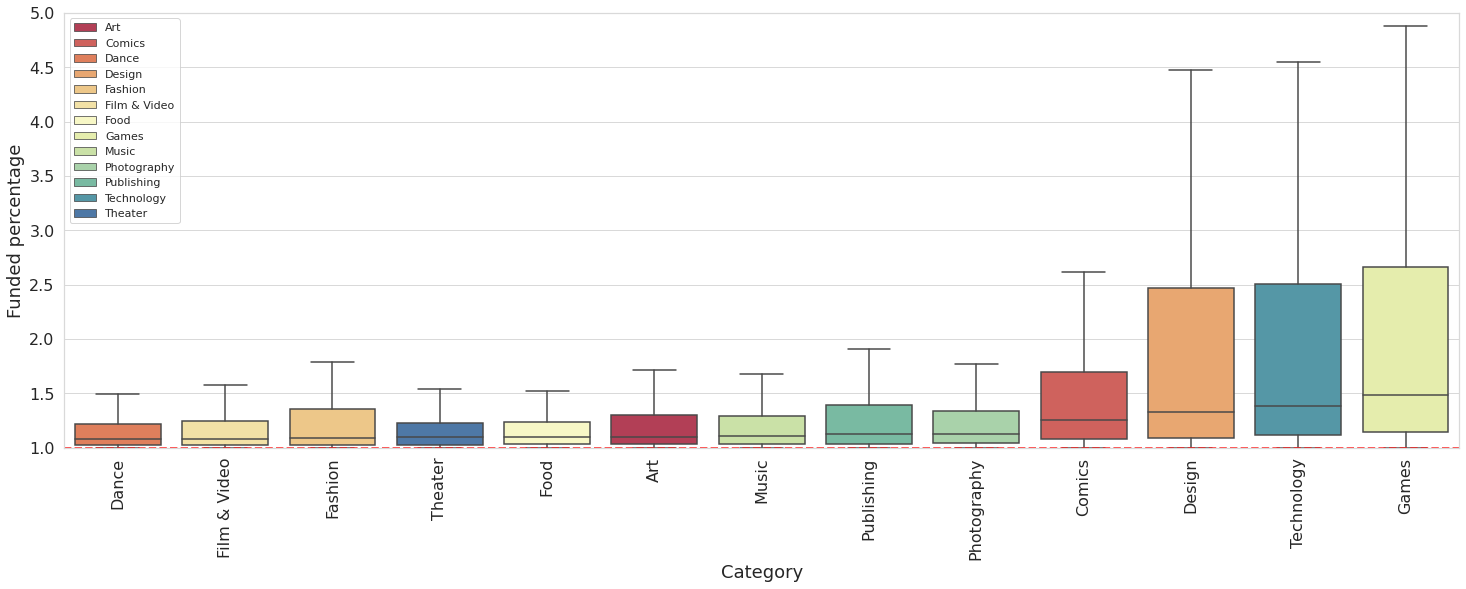

In [20]:
fig, ax = plt.subplots(figsize=(25,8))

my_order = df_successful.groupby(by="Category")["Funded percentage"].median().sort_values(ascending = True).index

box_subcat = sns.boxplot(data=df_successful, x='Category', y='Funded percentage', hue='Category', palette="Spectral", dodge = False, showfliers = False, order = my_order)
ax.axhline(y = 1, color='red', linewidth=2, alpha=.7, ls='--')
plt.xticks(rotation=90)
plt.ylim(1, 5)
plt.legend(loc='upper left')
my_order

Index(['Narrative Film', 'Performance Art', 'Public Art', 'Short Film',
       'Dance', 'Film & Video', 'Digital Art', 'Jazz', 'Mixed Media', 'Poetry',
       'Documentary', 'Fashion', 'Webseries', 'Theater', 'Food',
       'Children's Book', 'Music', 'Classical Music', 'World Music',
       'Conceptual Art', 'Sculpture', 'Pop', 'Rock', 'Journalism',
       'Publishing', 'Art', 'Indie Rock', 'Country & Folk', 'Hip-Hop',
       'Electronic Music', 'Nonfiction', 'Photography', 'Crafts', 'Periodical',
       'Animation', 'Open Software', 'Painting', 'Fiction', 'Design',
       'Art Book', 'Illustration', 'Video Games', 'Comics', 'Technology',
       'Product Design', 'Graphic Design', 'Board & Card Games', 'Games',
       'Open Hardware'],
      dtype='object', name='Subcategory')

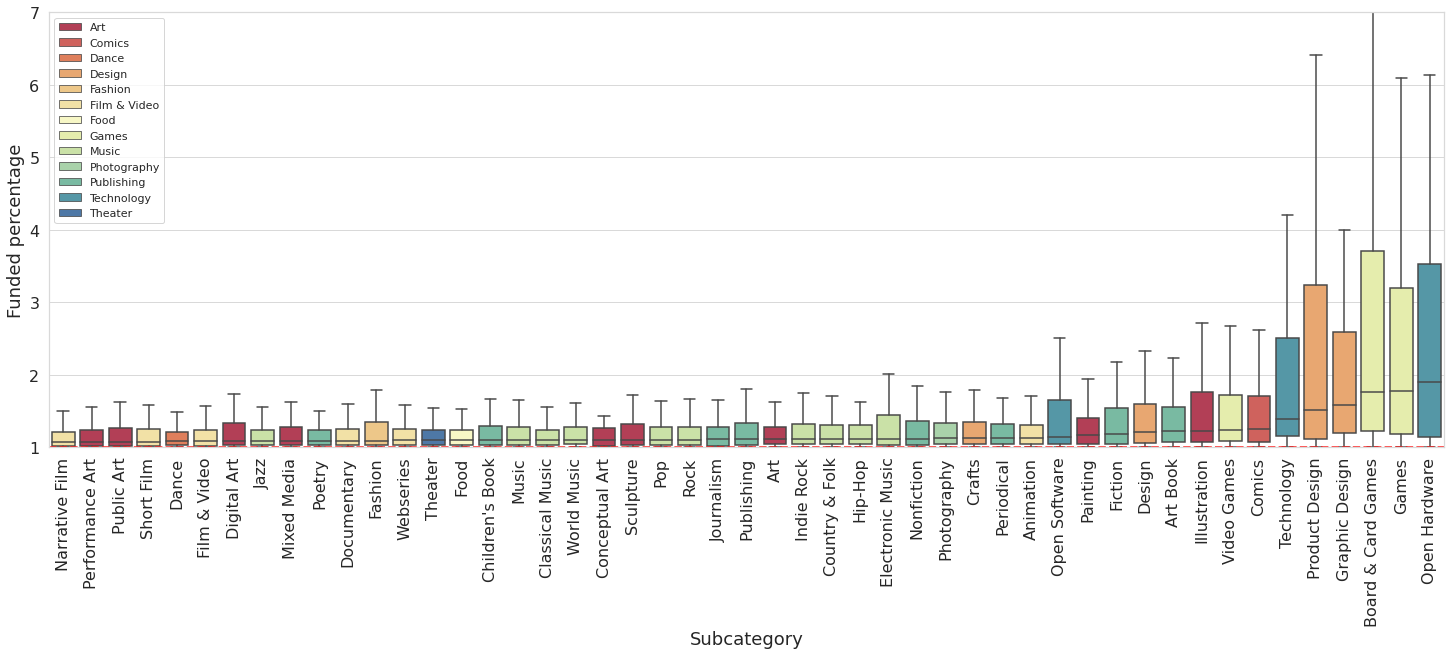

In [21]:
fig, ax = plt.subplots(figsize=(25,8))

my_order = df_successful.groupby(by="Subcategory")["Funded percentage"].median().sort_values(ascending = True).index

box_subcat = sns.boxplot(data=df_successful, x='Subcategory', y='Funded percentage', hue='Category', palette="Spectral", dodge = False, showfliers = False, order = my_order)
ax.axhline(y = 1, color='red', linewidth=2, alpha=.7, ls='--')
plt.xticks(rotation=90)
plt.ylim(1, 7)
plt.legend(loc='upper left')
my_order

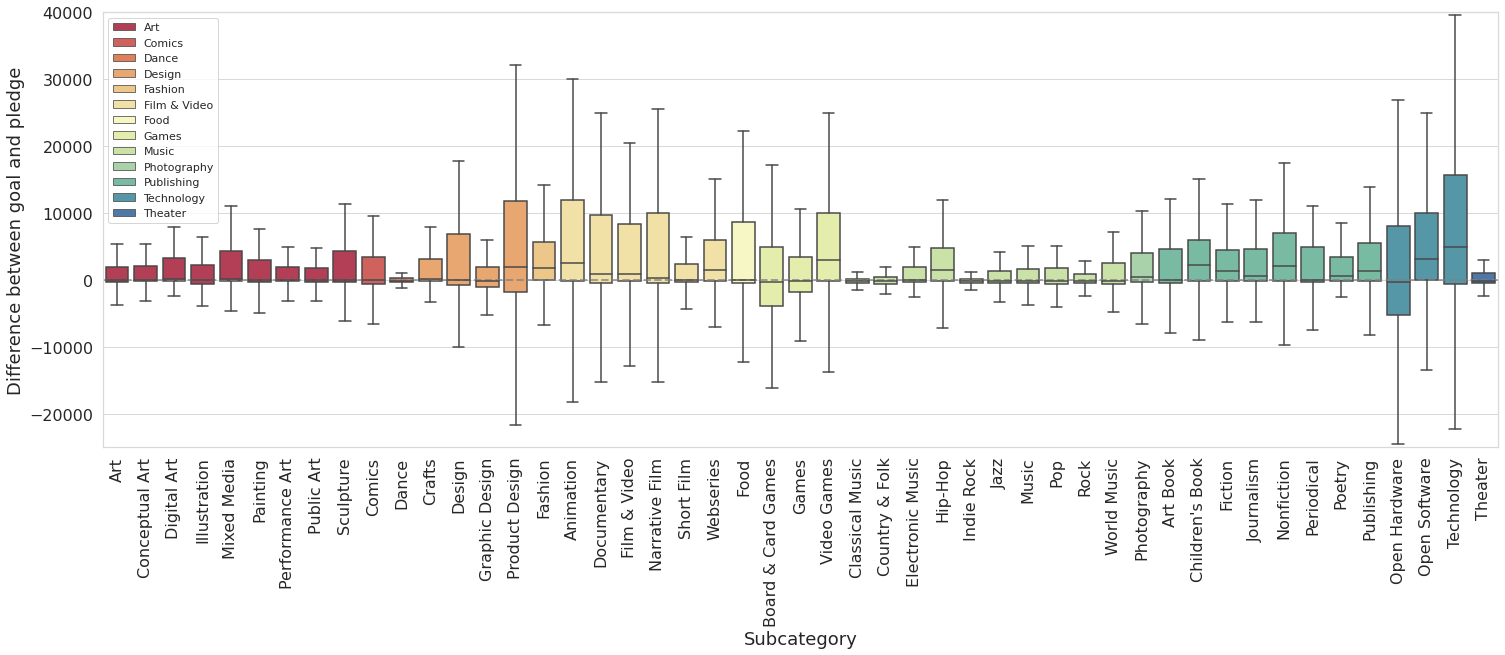

In [22]:
fig, ax = plt.subplots(figsize=(25,8))
box_subcat = sns.boxplot(data=df, x='Subcategory', y='Difference between goal and pledge', 
                         hue='Category', palette="Spectral", dodge = False, showfliers = False)
ax.axhline(y = 0, color='grey', linewidth=2, alpha=.7, ls='--')
plt.xticks(rotation=90)
plt.ylim(-25000, 40000) 
plt.legend(loc='upper left')

In [23]:
"""fig, ax = plt.subplots(figsize=(25,8))
#violin_subcat = sns.boxen(data=df, x='Category', y='Difference between goal and pledge', hue='Category', palette="Spectral", dodge = False)
point_subcat = sns.stripplot(data=df, x='Subcategory', y='Difference between goal and pledge', hue='Category', palette="Spectral", dodge = False, size = 3)

ax.axhline(y = 0, color='red', linewidth=2, alpha=.7, ls='--')
plt.xticks(rotation=90)
plt.ylim(-300000, 400000) 
plt.legend(loc='upper left')"""

'fig, ax = plt.subplots(figsize=(25,8))\n#violin_subcat = sns.boxen(data=df, x=\'Category\', y=\'Difference between goal and pledge\', hue=\'Category\', palette="Spectral", dodge = False)\npoint_subcat = sns.stripplot(data=df, x=\'Subcategory\', y=\'Difference between goal and pledge\', hue=\'Category\', palette="Spectral", dodge = False, size = 3)\n\nax.axhline(y = 0, color=\'red\', linewidth=2, alpha=.7, ls=\'--\')\nplt.xticks(rotation=90)\nplt.ylim(-300000, 400000) \nplt.legend(loc=\'upper left\')'

In [24]:
"""fig, ax = plt.subplots(figsize=(25,8))
#violin_subcat = sns.boxen(data=df, x='Category', y='Difference between goal and pledge', hue='Category', palette="Spectral", dodge = False)
point_subcat_percentage = sns.stripplot(data=df_successful, x='Subcategory', y='Funded percentage', 
                                        jitter = 1, hue='Category', palette="Spectral", dodge = False, size = 2)

ax.axhline(y = 1, color='red', linewidth=2, alpha=.7, ls='--')
plt.xticks(rotation=90)
plt.ylim(1, 5) 
plt.legend(loc='upper left')"""

'fig, ax = plt.subplots(figsize=(25,8))\n#violin_subcat = sns.boxen(data=df, x=\'Category\', y=\'Difference between goal and pledge\', hue=\'Category\', palette="Spectral", dodge = False)\npoint_subcat_percentage = sns.stripplot(data=df_successful, x=\'Subcategory\', y=\'Funded percentage\', \n                                        jitter = 1, hue=\'Category\', palette="Spectral", dodge = False, size = 2)\n\nax.axhline(y = 1, color=\'red\', linewidth=2, alpha=.7, ls=\'--\')\nplt.xticks(rotation=90)\nplt.ylim(1, 5) \nplt.legend(loc=\'upper left\')'

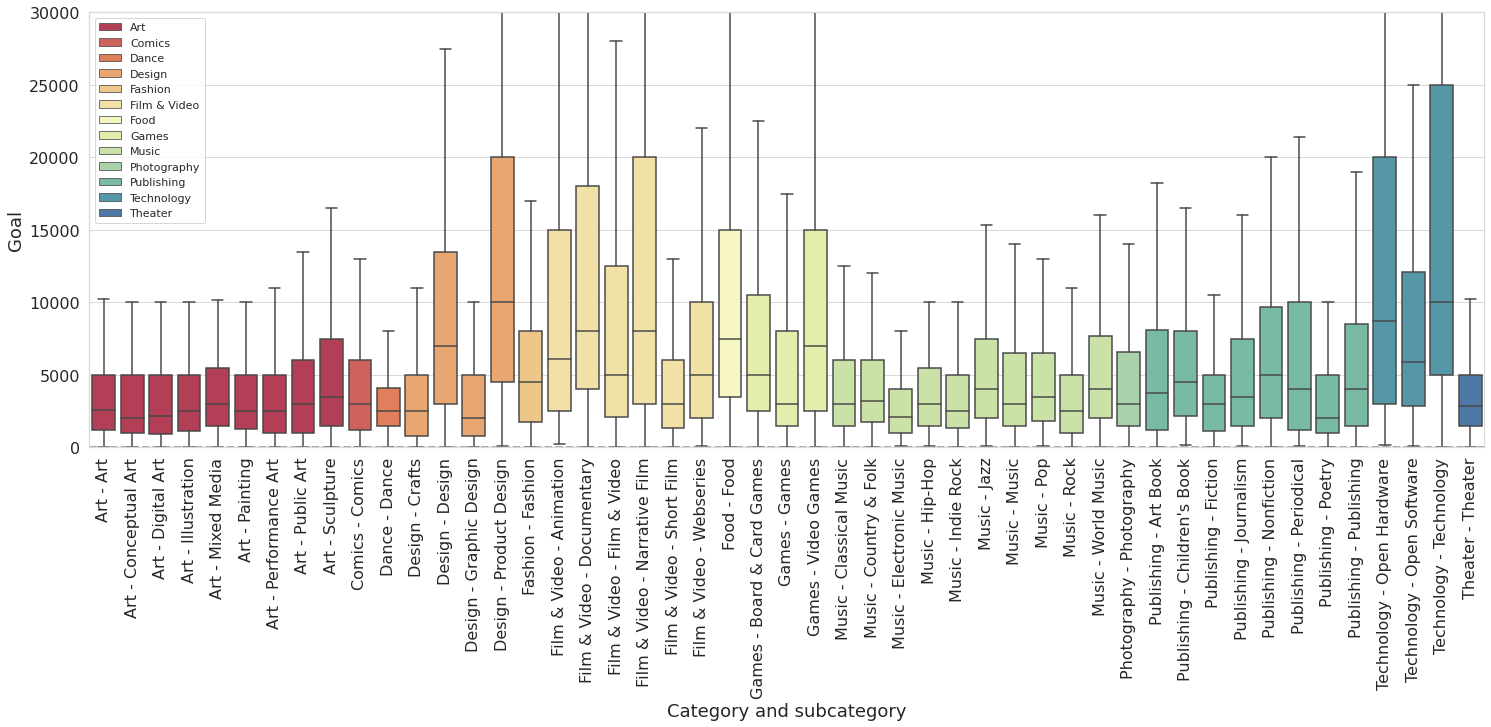

In [25]:
fig, ax = plt.subplots(figsize=(25,8))
box_subcat = sns.boxplot(data=df, x='Category and subcategory', y='Goal', 
                         hue='Category', palette="Spectral", dodge = False, showfliers = False)
ax.axhline(y = 1, color='grey', linewidth=2, alpha=.7, ls='--')
plt.xticks(rotation=90)
plt.ylim(0, 30000)
plt.legend(loc='upper left')

#### Goal and Pledged

(0.0, 20000.0)

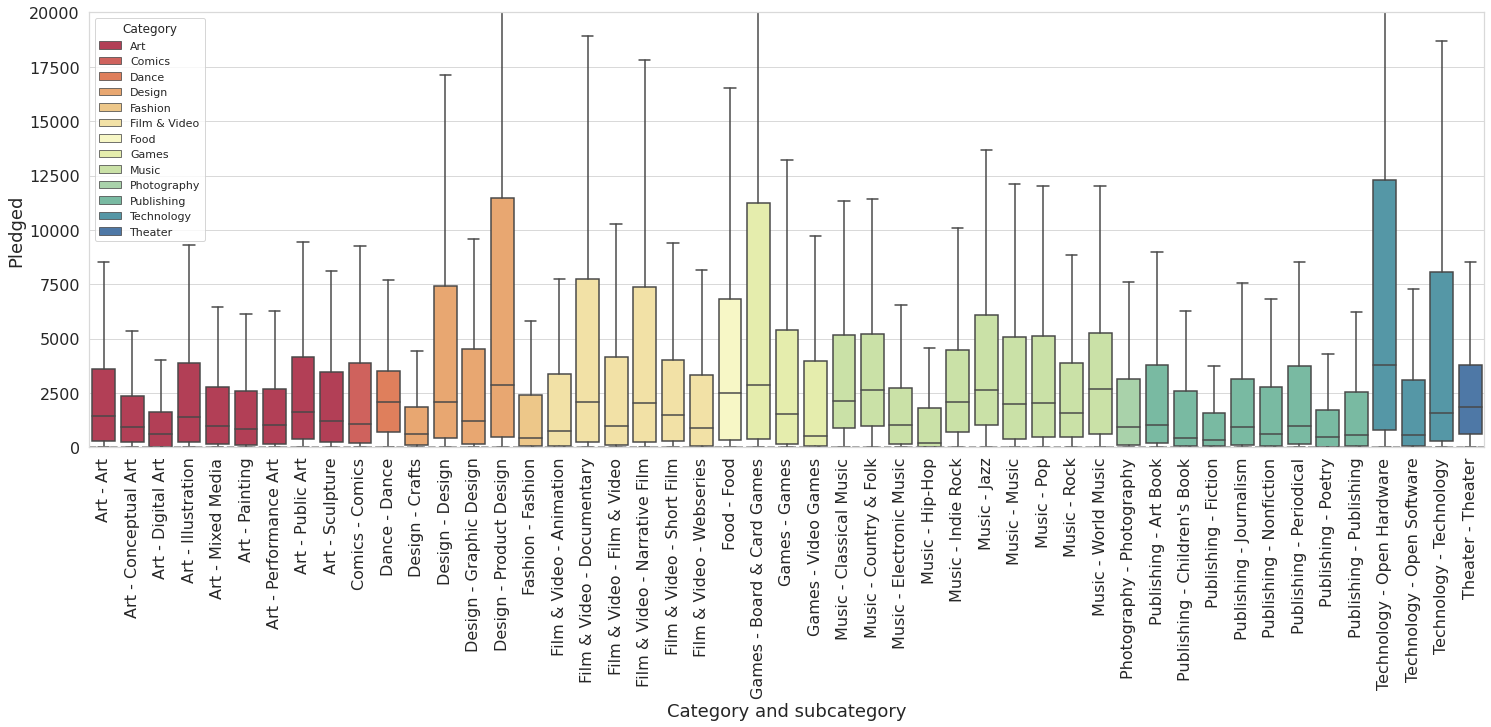

In [26]:
fig, ax = plt.subplots(figsize=(25,8))
box_subcat = sns.boxplot(data=df, x='Category and subcategory', y='Pledged', 
                         hue='Category', palette="Spectral", dodge = False, showfliers = False)
ax.axhline(y = 1, color='grey', linewidth=2, alpha=.7, ls='--')
plt.xticks(rotation=90)
plt.ylim(0, 20000)

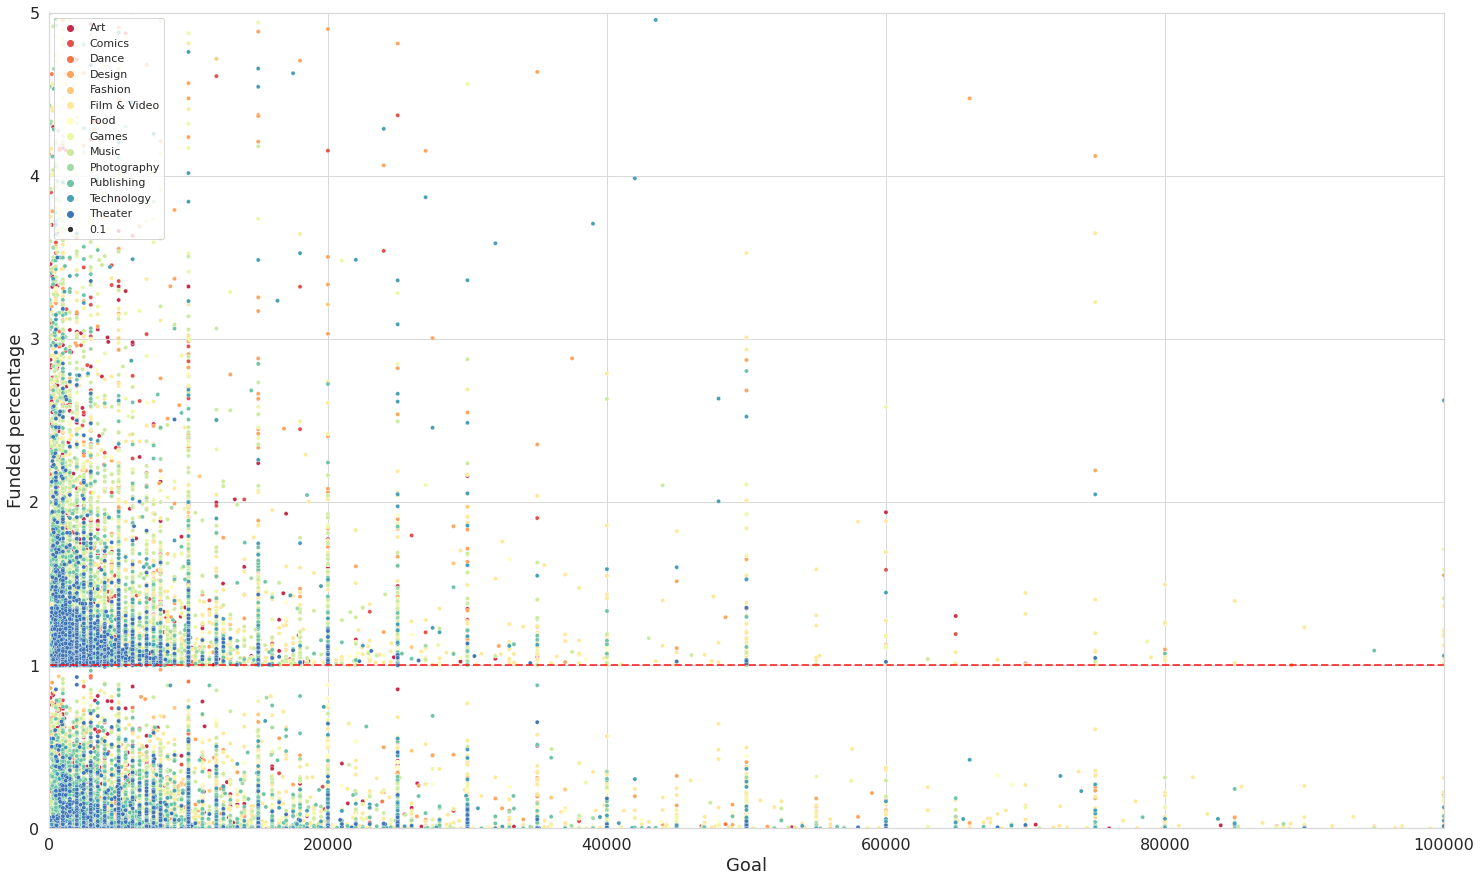

In [27]:
fig, ax = plt.subplots(figsize=(25,15))
scatter_subcat = sns.scatterplot(data=df, x='Goal', y='Funded percentage', hue='Category', palette="Spectral", size = 0.1)
ax.axhline(y = 1, color='red', linewidth=2, alpha=.7, ls='--')
#plt.xticks(rotation=90)
plt.xlim(0, 100000)
plt.ylim(0, 5)
plt.legend(loc='upper left')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Art - Art'),
  Text(1, 0, 'Art - Conceptual Art'),
  Text(2, 0, 'Art - Digital Art'),
  Text(3, 0, 'Art - Illustration'),
  Text(4, 0, 'Art - Mixed Media'),
  Text(5, 0, 'Art - Painting'),
  Text(6, 0, 'Art - Performance Art'),
  Text(7, 0, 'Art - Public Art'),
  Text(8, 0, 'Art - Sculpture'),
  Text(9, 0, 'Comics - Comics'),
  Text(10, 0, 'Dance - Dance'),
  Text(11, 0, 'Design - Crafts'),
  Text(12, 0, 'Design - Design'),
  Text(13, 0, 'Design - Graphic Design'),
  Text(14, 0, 'Design - Product Design'),
  Text(15, 0, 'Fashion - Fashion'),
  Text(16, 0, 'Film & Video - Animation'),
  Text(17, 0, 'Film & Video - Documentary'),
  Text(18, 0, 'Film & Video - Film & Video'),
  Text(19, 0, 'Film & Video - Narrative Film'),
  Text(20, 0, 'Film & Video - Shor

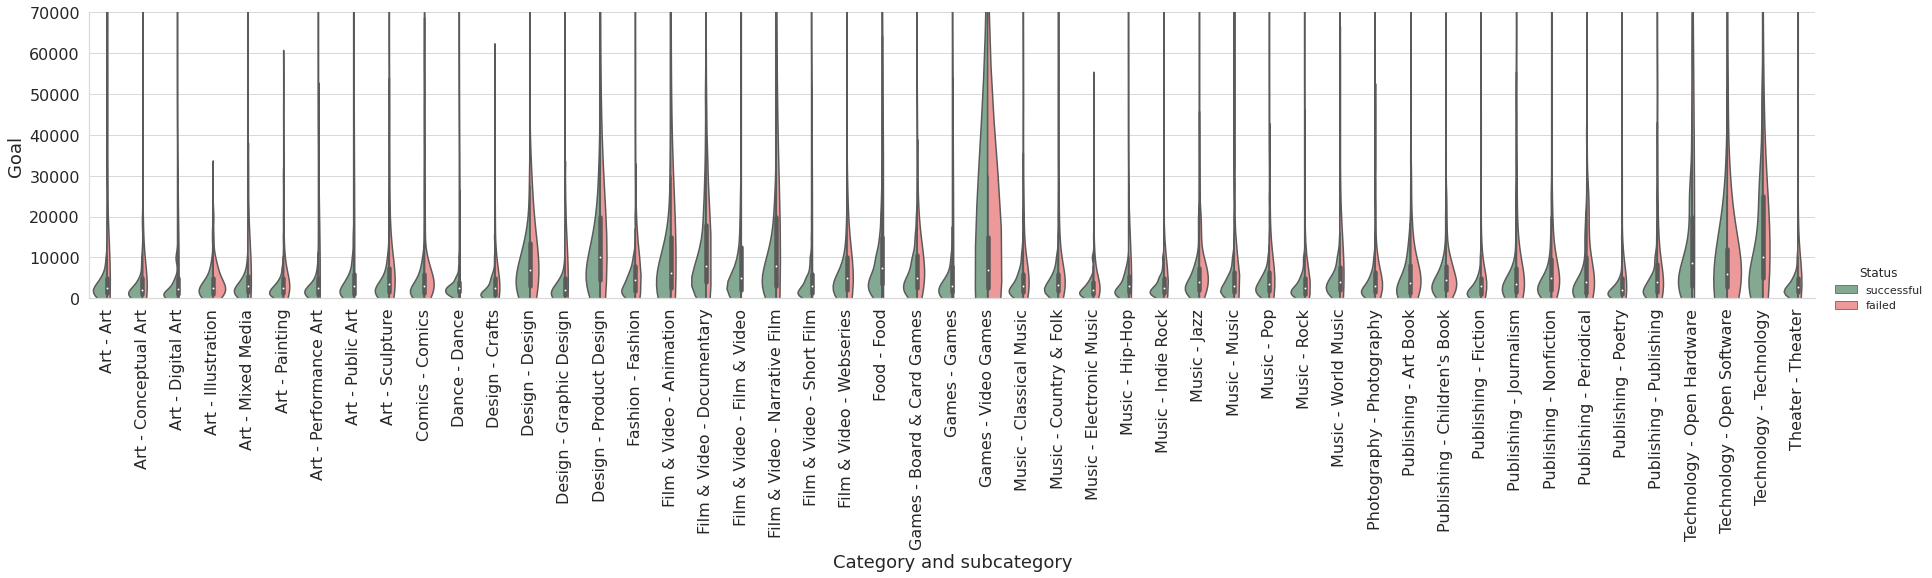

In [28]:
#fig, ax = plt.subplots(figsize=(25,15))
goal_violin = sns.catplot(x="Category and subcategory", y="Goal", hue="Status",
            kind="violin", split = True, data=df, height = 5, aspect = 5)
plt.ylim(0, 70000)
plt.xticks(rotation=90)

In [29]:
df[df["Category"] == "Food"]

Name  ... Category and subcategory
76                                       HAPPY AS A CLAM  ...              Food - Food
83                                      TOMATOCLAM et al  ...              Food - Food
113                            Great Beer Goes Down Easy  ...              Food - Food
144    Robotic First Fruits Farm-Sustainable Food, En...  ...              Food - Food
152    NADIA'S KITCHEN. Moroccan food stand in Brookl...  ...              Food - Food
...                                                  ...  ...                      ...
45841                    Macaron Porn:  Parisian Recipes  ...              Food - Food
45842                    Macaron Porn:  Parisian Recipes  ...              Food - Food
45843                     Stickmen Brewery &amp; Skewery  ...              Food - Food
45844                     Stickmen Brewery &amp; Skewery  ...              Food - Food
45936  The Best Little Sweet Shop in Vegas: Naked Cit...  ...              Food - Food

[1298 rows x 26 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Technology - Technology'),
  Text(1, 0, 'Design - Product Design'),
  Text(2, 0, 'Technology - Open Hardware'),
  Text(3, 0, 'Film & Video - Documentary'),
  Text(4, 0, 'Film & Video - Narrative Film'),
  Text(5, 0, 'Food - Food'),
  Text(6, 0, 'Games - Video Games'),
  Text(7, 0, 'Design - Design'),
  Text(8, 0, 'Film & Video - Animation'),
  Text(9, 0, 'Technology - Open Software'),
  Text(10, 0, 'Games - Board & Card Games'),
  Text(11, 0, 'Film & Video - Webseries'),
  Text(12, 0, 'Film & Video - Film & Video'),
  Text(13, 0, 'Publishing - Nonfiction'),
  Text(14, 0, 'Fashion - Fashion'),
  Text(15, 0, "Publishing - Children's Book"),
  Text(16, 0, 'Music - World Music'),
  Text(17, 0, 'Publishing - Periodical'),
  Text(18, 0, 'Music - Jazz'),
  Text

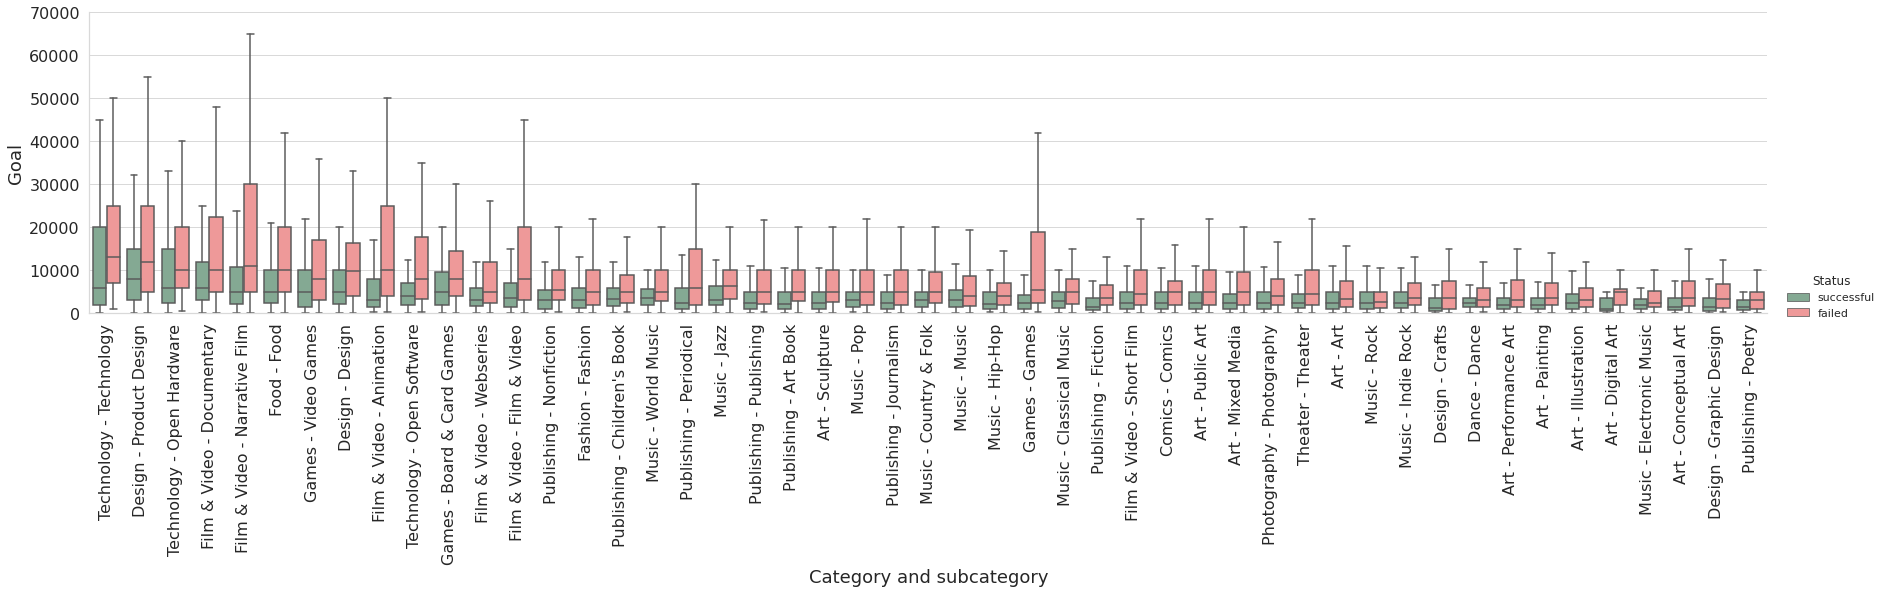

In [30]:
my_order = df.groupby(by="Category and subcategory")["Goal"].median().sort_values(ascending = False).index

goal_violin = sns.catplot(x="Category and subcategory", y="Goal", hue="Status",
            kind="box", data=df, height = 5, aspect = 5, showfliers = False, order = my_order)
plt.ylim(0, 70000)
#[ax.axvline(goal_violin, color = 'r', linestyle='--') for x in [1,2,3,4]] # you can put your desired colour instead of red.
plt.xticks(rotation=90)

In [31]:
df_median_goal_success = df_successful.groupby('Category and subcategory').agg({'Goal':np.median}).reset_index()
df_median_goal_failed = df_failed.groupby('Category and subcategory').agg({'Goal':np.median}).reset_index()
df_median_goal = pd.concat([df_median_goal_success, df_median_goal_failed], axis = 1)
df_median_goal
#df_median_goal.to_csv("df_median_goal.csv", index=False)


Category and subcategory  ...     Goal
0                       Art - Art  ...   3316.5
1            Art - Conceptual Art  ...   3500.0
2               Art - Digital Art  ...   5000.0
3              Art - Illustration  ...   3000.0
4               Art - Mixed Media  ...   5000.0
5                  Art - Painting  ...   3500.0
6           Art - Performance Art  ...   3000.0
7                Art - Public Art  ...   5000.0
8                 Art - Sculpture  ...   5000.0
9                 Comics - Comics  ...   5000.0
10                  Dance - Dance  ...   3000.0
11                Design - Crafts  ...   3500.0
12                Design - Design  ...   9950.0
13        Design - Graphic Design  ...   3250.0
14        Design - Product Design  ...  12000.0
15              Fashion - Fashion  ...   5000.0
16       Film & Video - Animation  ...  10000.0
17     Film & Video - Documentary  ...  10000.0
18    Film & Video - Film & Video  ...   7900.0
19  Film & Video - Narrative Film  ...  11000.0
20      Film & Video - Short Film  ...   4500.0
21       Film & Video - Webseries  ...   5000.0
22                    Food - Food  ...  10000.0
23     Games - Board & Card Games  ...   8000.0
24                  Games - Games  ...   5500.0
25            Games - Video Games  ...   8000.0
26        Music - Classical Music  ...   5000.0
27         Music - Country & Folk  ...   5000.0
28       Music - Electronic Music  ...   2500.0
29                Music - Hip-Hop  ...   4000.0
30             Music - Indie Rock  ...   3500.0
31                   Music - Jazz  ...   6250.0
32                  Music - Music  ...   4000.0
33                    Music - Pop  ...   5000.0
34                   Music - Rock  ...   2650.0
35            Music - World Music  ...   5000.0
36      Photography - Photography  ...   4000.0
37          Publishing - Art Book  ...   5000.0
38   Publishing - Children's Book  ...   5000.0
39           Publishing - Fiction  ...   3500.0
40        Publishing - Journalism  ...   5000.0
41        Publishing - Nonfiction  ...   5500.0
42        Publishing - Periodical  ...   6000.0
43            Publishing - Poetry  ...   3000.0
44        Publishing - Publishing  ...   5000.0
45     Technology - Open Hardware  ...  10000.0
46     Technology - Open Software  ...   8000.0
47        Technology - Technology  ...  13000.0
48              Theater - Theater  ...   4500.0

[49 rows x 4 columns]

### Duration 

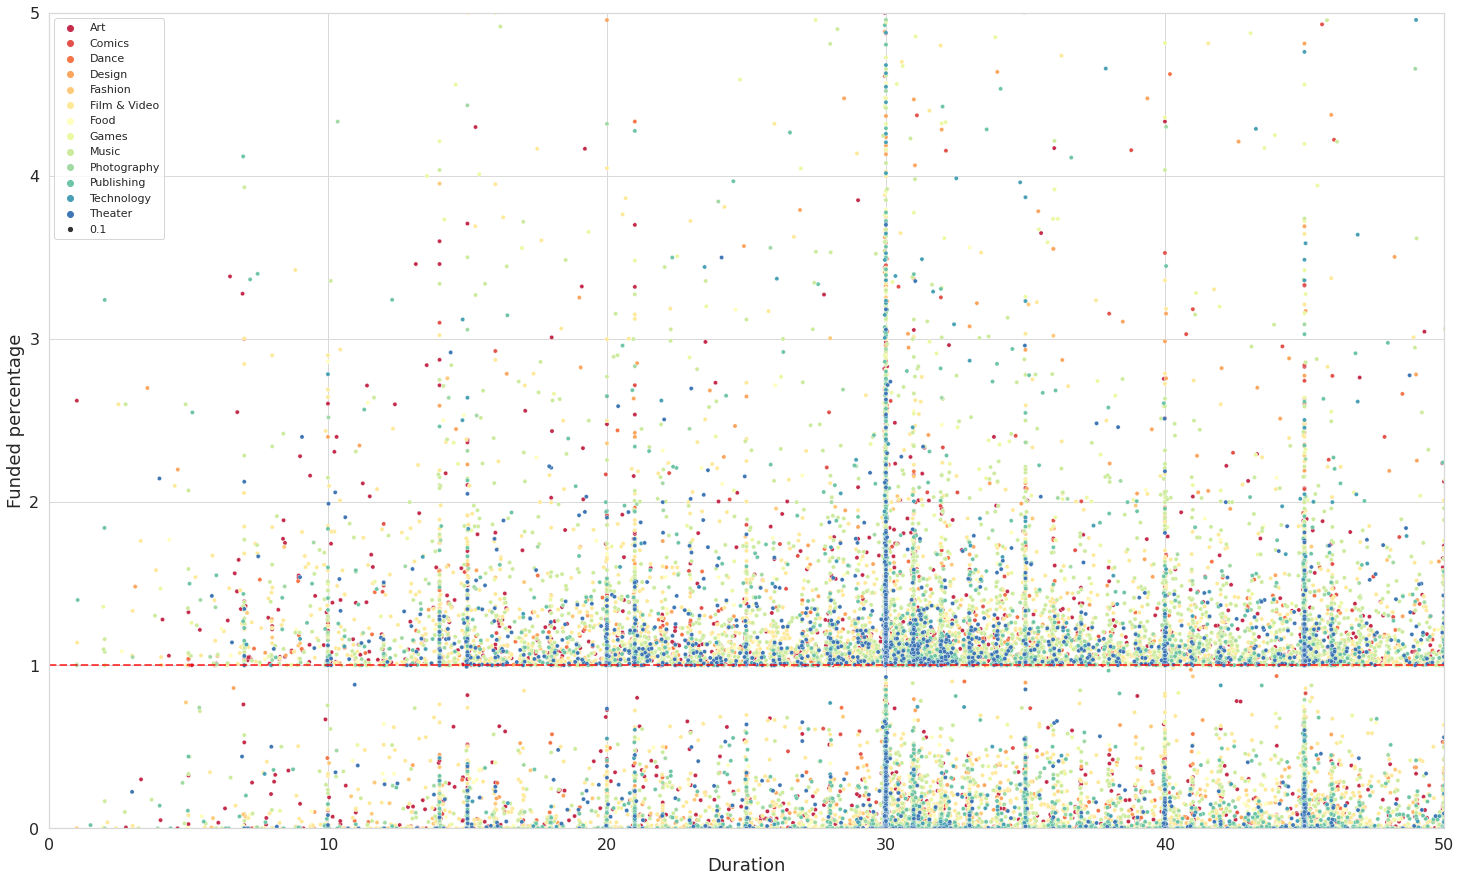

In [32]:
fig, ax = plt.subplots(figsize=(25,15))
scatter_subcat = sns.scatterplot(data=df, x='Duration', y='Funded percentage', hue='Category', palette="Spectral", size = 0.1)
ax.axhline(y = 1, color='red', linewidth=2, alpha=.7, ls='--')
#plt.xticks(rotation=90)
plt.xlim(0, 50)
plt.ylim(0, 5)
plt.legend(loc='upper left')

Text(0, 0.5, 'Density')

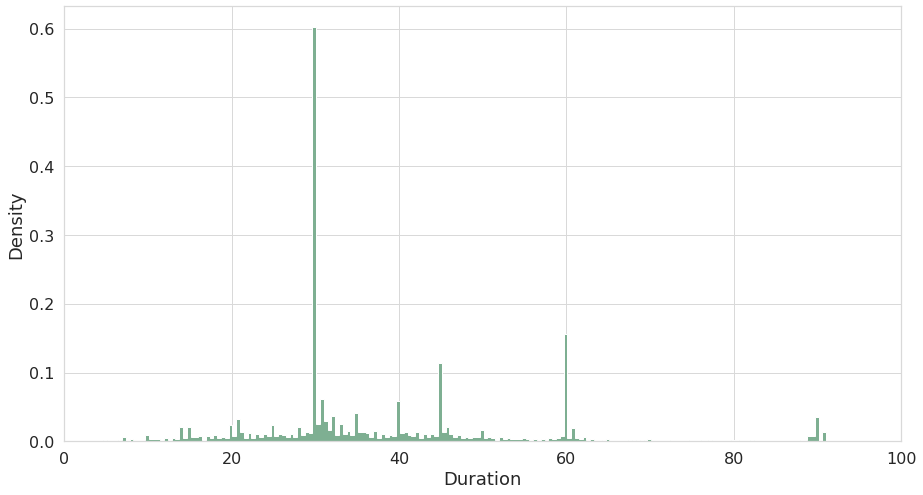

In [33]:
fig, ax = plt.subplots(figsize=(15,8))
y_hist= plt.hist(df_successful["Duration"].values.flatten(), bins =200, 
                 histtype = "stepfilled", color = "#7EAF92", density = True, stacked = True)
plt.xlim(0, 100)
plt.xlabel("Duration")
plt.ylabel("Density")

Text(0, 0.5, 'Density')

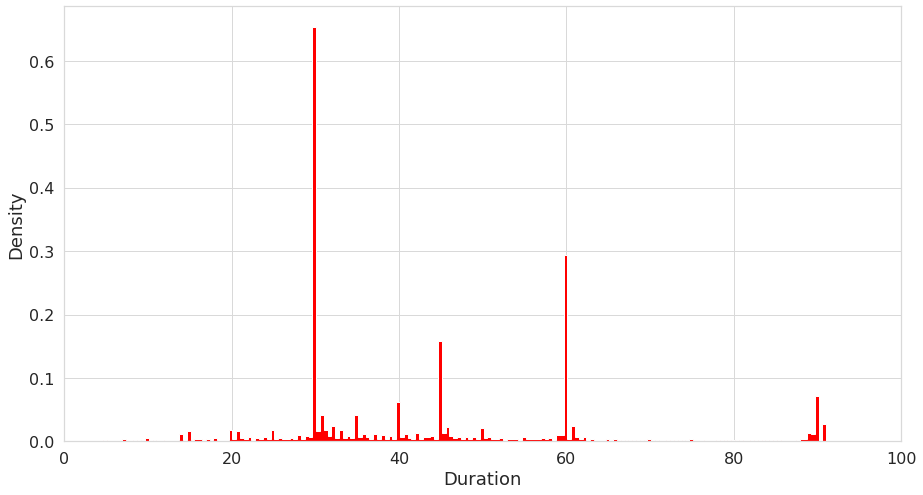

In [34]:
fig, ax = plt.subplots(figsize=(15,8))
y_hist= plt.hist(df_failed["Duration"].values.flatten(), bins =200, 
                 histtype = "stepfilled", color = "red", density = True, stacked = True)
plt.xlim(0, 100)
plt.xlabel("Duration")
plt.ylabel("Density")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Art - Art'),
  Text(1, 0, 'Art - Conceptual Art'),
  Text(2, 0, 'Art - Digital Art'),
  Text(3, 0, 'Art - Illustration'),
  Text(4, 0, 'Art - Mixed Media'),
  Text(5, 0, 'Art - Painting'),
  Text(6, 0, 'Art - Performance Art'),
  Text(7, 0, 'Art - Public Art'),
  Text(8, 0, 'Art - Sculpture'),
  Text(9, 0, 'Comics - Comics'),
  Text(10, 0, 'Dance - Dance'),
  Text(11, 0, 'Design - Crafts'),
  Text(12, 0, 'Design - Design'),
  Text(13, 0, 'Design - Graphic Design'),
  Text(14, 0, 'Design - Product Design'),
  Text(15, 0, 'Fashion - Fashion'),
  Text(16, 0, 'Film & Video - Animation'),
  Text(17, 0, 'Film & Video - Documentary'),
  Text(18, 0, 'Film & Video - Film & Video'),
  Text(19, 0, 'Film & Video - Narrative Film'),
  Text(20, 0, 'Film & Video - Shor

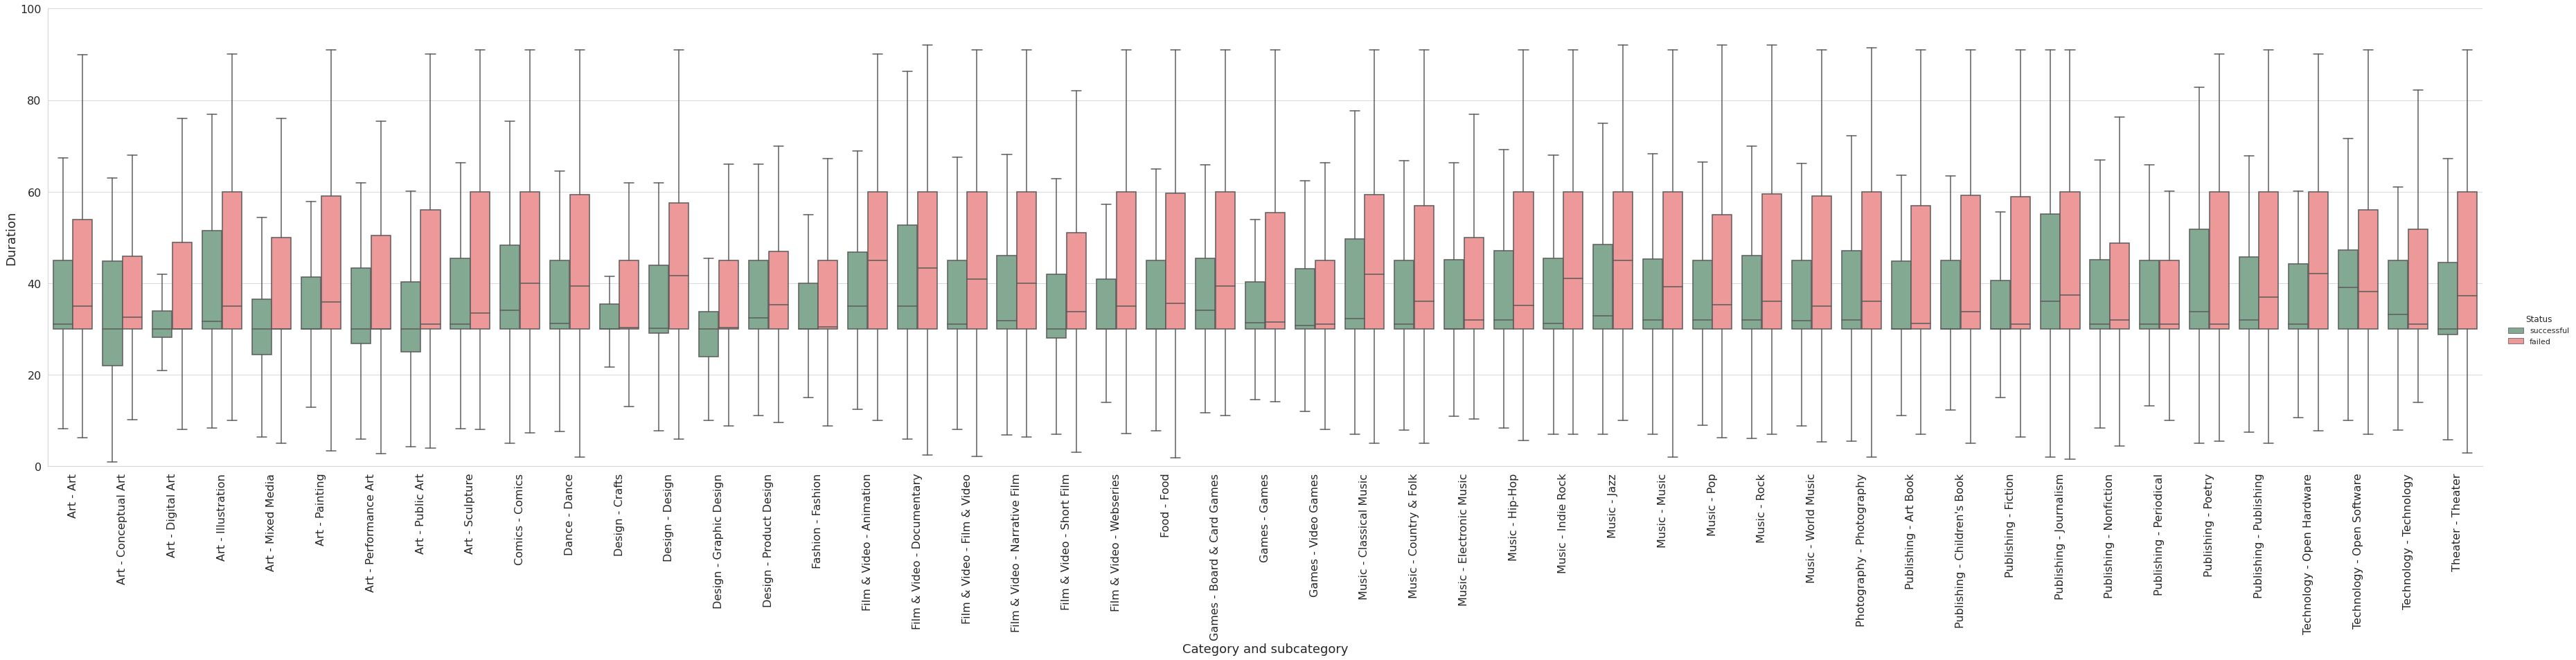

In [35]:
goal_violin = sns.catplot(x="Category and subcategory", y="Duration", hue="Status",
            kind="box", data=df, height = 10, aspect = 5, showfliers = False)
plt.ylim(0, 100)
plt.xticks(rotation=90)
#

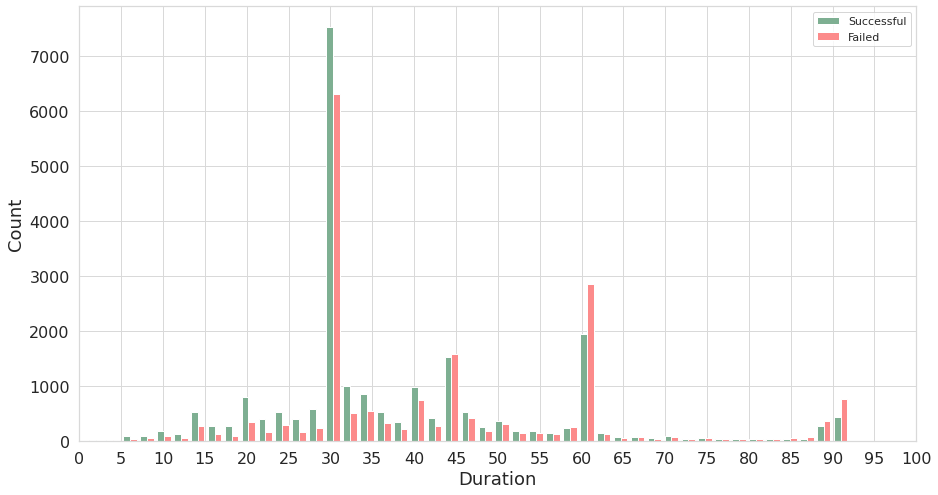

In [36]:
fig, ax = plt.subplots(figsize=(15,8))

labels = ["Successful", "Failed"]
duration_both = [df_successful["Duration"], df_failed["Duration"]]
#plt.hist(duration_both, bins = round((df["Duration"].max()-df["Duration"].min())/2), density=True)
plt.hist(duration_both, bins =45, density=False)

plt.xlim(0,100)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xlabel("Duration")
plt.ylabel("Count")
ax.legend(labels)

Text(0, 0.5, 'Count')

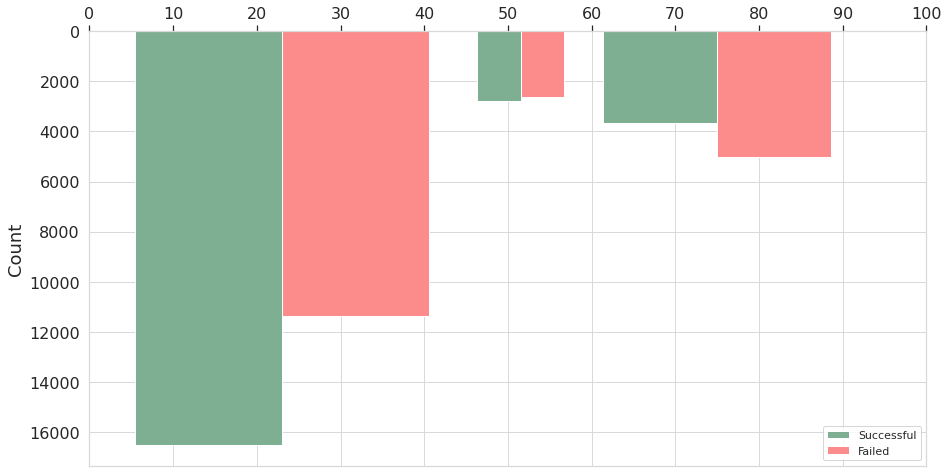

In [37]:
fig, ax = plt.subplots(figsize=(15,8))

labels = ["Successful", "Failed"]
duration_both = [df_successful["Duration"], df_failed["Duration"]]
duration_hist_2 = plt.hist(duration_both, 
         bins = [df["Duration"].min(),45, 58, df["Duration"].max()], 
         density=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

plt.xlim(0,100)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.legend(labels, loc = "lower right")
#plt.xlabel("Duration")
plt.ylabel("Count")

In [38]:

"""from matplotlib.animation import FuncAnimation
#plt.style.use('seaborn-pastel')


fig, ax = plt.subplots(figsize=(15,8))
plt.xlim(0,100)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')"""

"from matplotlib.animation import FuncAnimation\n#plt.style.use('seaborn-pastel')\n\n\nfig, ax = plt.subplots(figsize=(15,8))\nplt.xlim(0,100)\nax.xaxis.set_major_locator(plt.MaxNLocator(10))\n\nline, = ax.plot([], [], lw=3)\n\ndef init():\n    line.set_data([], [])\n    return line,\ndef animate(i):\n    x = np.linspace(0, 4, 1000)\n    y = np.sin(2 * np.pi * (x - 0.01 * i))\n    line.set_data(x, y)\n    return line,\n\nanim = FuncAnimation(fig, animate, init_func=init,\n                               frames=200, interval=20, blit=True)\n\n\nanim.save('sine_wave.gif', writer='imagemagick')"

(0.0, 100.0)

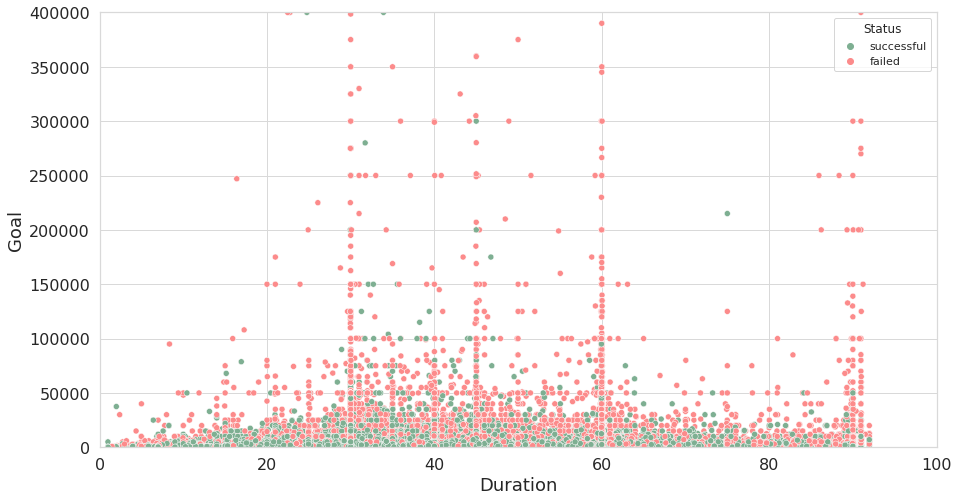

In [39]:
fig, ax = plt.subplots(figsize=(15,8))
goal_duration = sns.scatterplot(y="Goal", x="Duration", hue="Status", data=df)

plt.ylim(0, 400000)
plt.xlim(0, 100)

### Time

(array([14365., 14488., 14610., 14730., 14853., 14975., 15095., 15218.,
        15340., 15461.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

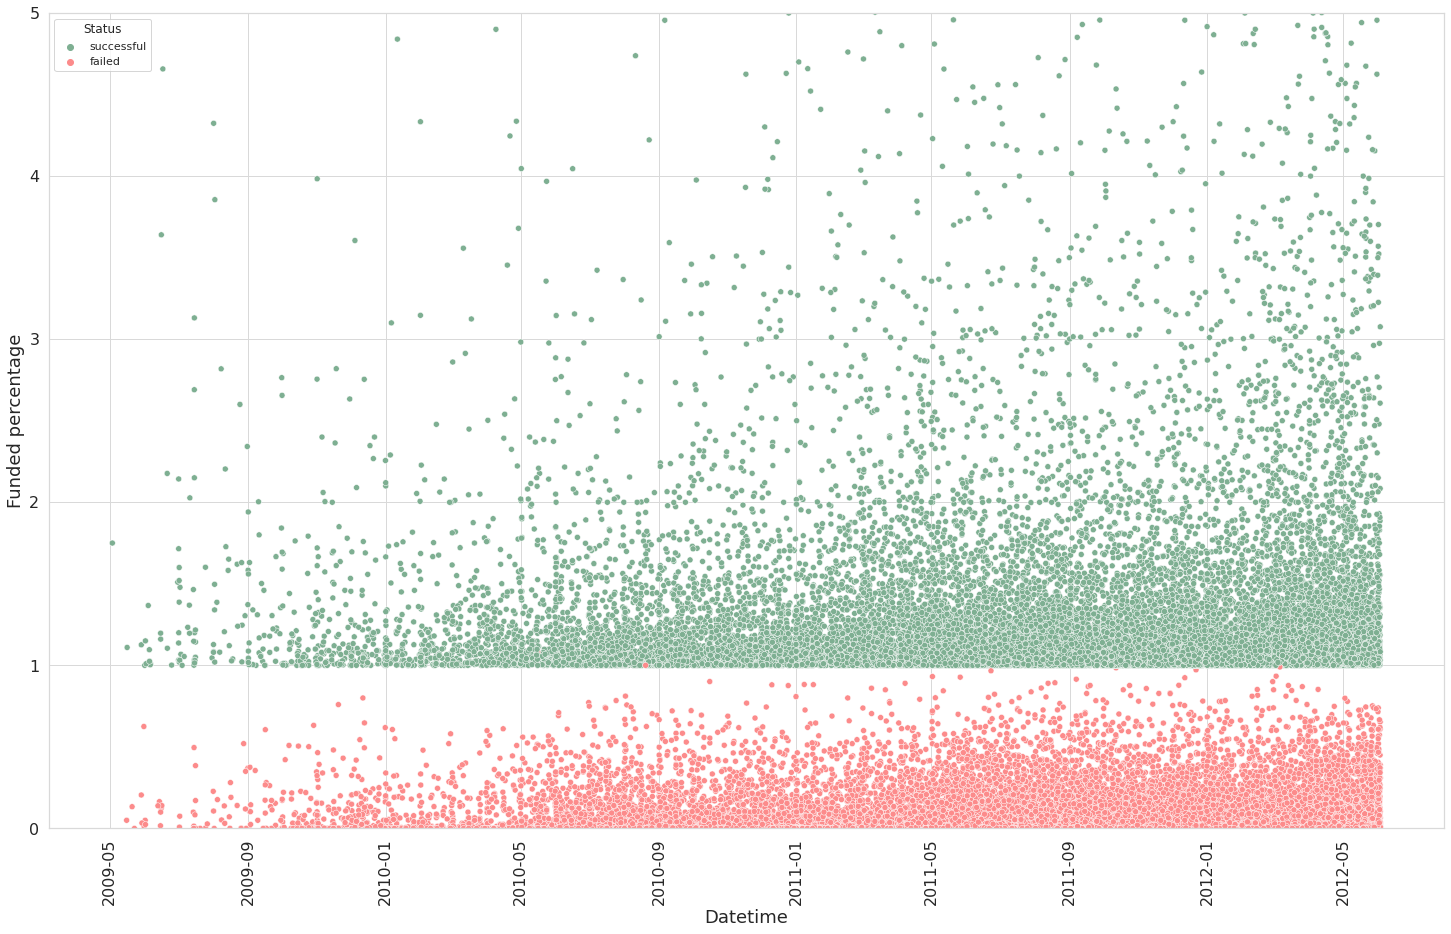

In [40]:
fig, ax = plt.subplots(figsize=(25,15))
sns.scatterplot(data = df, x = "Datetime", y = "Funded percentage", hue = "Status" )
plt.ylim(0, 5)
plt.xticks(rotation=90)

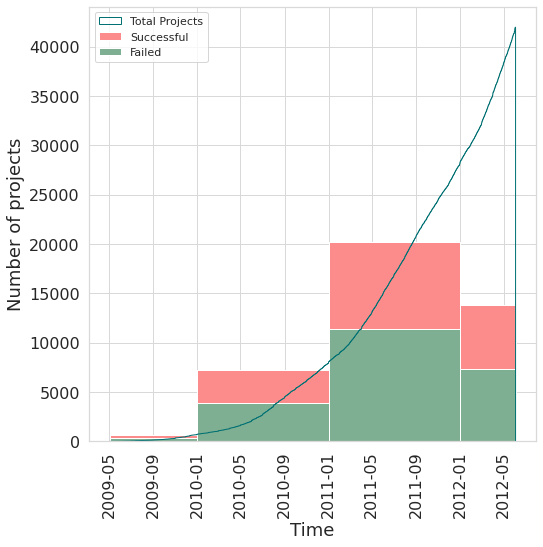

In [41]:
fig, ax = plt.subplots(figsize=(8,8))

# Draw cumulative line
plt.hist(df["Datetime"], bins =1000, 
                 histtype = "step", cumulative= True, color = '#027173')
# Plot total bar
bins =[df["Datetime"].min(), pd.to_datetime("1-1-2010"), pd.to_datetime("1-1-2011"), pd.to_datetime("1-1-2012"), df["Datetime"].max()]

# Plot success bar
plt.hist(df["Datetime"], bins =bins, histtype = "bar", color = "#fc8b8b")
# Plot success bar
plt.hist(df_successful["Datetime"], bins =bins, histtype = "bar", color = "#7EAF92")
plt.xticks(rotation = 90)

labels = ["Total Projects", "Successful", "Failed"]
plt.legend(labels, loc = "upper left")
plt.xlabel("Time")
plt.ylabel("Number of projects")
print()

(1.0, 2.1)

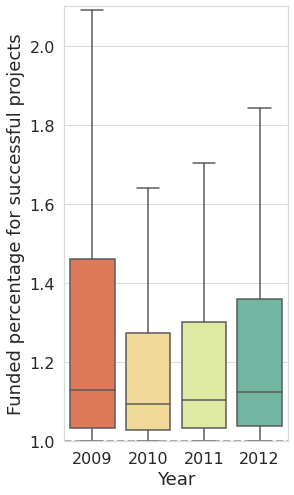

In [42]:
fig, ax = plt.subplots(figsize=(4,8))
box_subcat = sns.boxplot(data=df_successful, x='Year', y='Funded percentage', 
                          palette="Spectral", dodge = False, showfliers = False)
ax.axhline(y = 1, color='grey', linewidth=2, alpha=.7, ls='--')
plt.ylabel("Funded percentage for successful projects")
plt.ylim(1, 2.1)

NameError: name 'months' is not defined

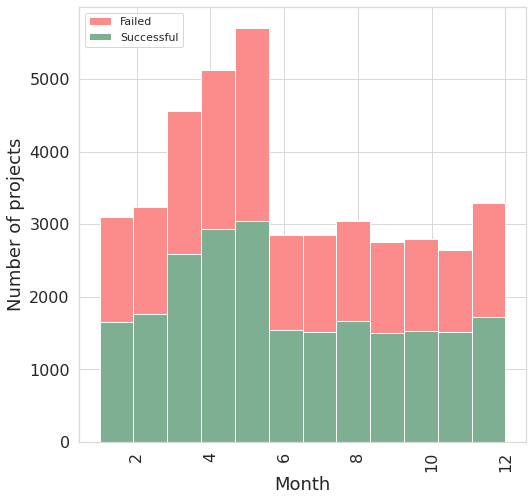

In [43]:
fig, ax = plt.subplots(figsize=(8,8))

# Plot success bar
plt.hist(df["Month numeric"], bins =12, histtype = "bar", color = "#fc8b8b")
# Plot success bar
plt.hist(df_successful["Month numeric"], bins =12, histtype = "bar", color = "#7EAF92")
plt.xticks(rotation = 90)

labels = ["Failed", "Successful"]
plt.legend(labels, loc = "upper left")
plt.xlabel("Month")
plt.ylabel("Number of projects")
ax.set_xticklabels(months, rotation=90) #set the labels and rotate them 90 deg.
plt.xticks(np.arange(1, 13, 1))
print()


In [ ]:
month_count_total = df["Month"].value_counts()
month_count_successful = df_successful["Month"].value_counts()
month_count_failed = df_failed["Month"].value_counts()
month_all_counts = pd.concat([month_count_total, month_count_successful, month_count_failed], axis = 1)
column = ["Total", "Successful", "Failed"]
month_all_counts["Successful Percentage"] = round(month_count_successful/month_count_total*100).astype("int64")
month_all_counts["Failed Percentage"] = round(month_count_failed/month_count_total*100).astype("int64")
month_all_counts["Total Percentage"] = 100


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_all_counts = month_all_counts.reindex(months)
month_all_counts

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

labels = ["Failed", "Successful"]
#plt.hist(duration_both, bins = round((df["Duration"].max()-df["Duration"].min())/2), density=True)
plt.bar(month_all_counts.index, month_all_counts["Total Percentage"], color = "#fc8b8b")
plt.bar(month_all_counts.index, month_all_counts["Successful Percentage"], color = "#7EAF92")


plt.ylim(0,100)
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.legend(labels)
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.xlabel("Months")
plt.ylabel("Percentage of success and failure")

In [ ]:
fig, ax = plt.subplots(figsize=(4,8))
box_subcat = sns.boxplot(data=df_successful, x='Month', y='Funded percentage', 
                          palette="Spectral", dodge = False, showfliers = False, order = months)
ax.axhline(y = 1, color='grey', linewidth=2, alpha=.7, ls='--')
plt.ylabel("Funded percentage for successful projects")
plt.ylim(1, 1.9)
plt.xticks(rotation = 90)
print()